## Goal of this Notebook
#### We would like to differentiate between the following price movement categories:

1. **Very big drop**  
movement < -2σ  (~2.2% chance)
2. **Big drop**  
-σ > movement > -2σ  (~13.6% chance)
3. **Drop**  
-0.5σ > movement > -σ  (~15% chance)
4. **Modest Drop**  
-0.5σ > movement > 0  (~19.2% chance)
5. **Modest Gain**  
0.5σ > movement > 0  (~19.2% chance)
6. **Gain**   
σ > movement > 0.5σ  (~15% chance)
7. **Big Gain**  
2σ > movement > 1σ  (~13.6% chance)
8. **Very Big Gain**  
movement > 2σ  (~2.2% chance)

These categories are defined arbitrarily and can be changed if something more suitable or sensible is found.


Percentage values taken from [here](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)

### We will plot the standard deviation for a few stocks and color in the different categories

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy import stats

In [2]:
def get_price_movements(df):
    """ Get the daily movement of a stock that's in a data frame"""
    df = df.sort_index(axis=0)
    movement = np.zeros(len(df))
    last_price = -1
    i = 0
    for index, row in df.iterrows():
        if (last_price < 0):
            movement[i] = 0
        else:
            movement[i] = 100 * row['close'] / last_price - 100
    
        last_price = row['close']
        i += 1
    
    return movement

In [3]:
def plot_gaussian(x, x_min=-10, x_max=10, n=10000, fill=False):
    """
    Expects an np array of movement percentages, 
    plots the gaussian kernel density estimate
    """
    ## Learn the kernel-density estimate from the data
    density = stats.gaussian_kde(x)
    
    ## Evaluate the output on some data points
    xs = np.linspace(x_min, x_max, n)
    y = density.evaluate(xs)
    
    ## Create the plot
    plt.plot(xs, y)
    plt.xlabel('Daily Movement Percentage')
    plt.ylabel('Density')
    
    if (fill):
        plt.fill_between(xs, 0, y)

In [4]:
def ticker_from_csv(csv_string):
    """ 
    The downloaded files come in the form [ticker].csv. 
    We are just stripping off the csv extension and making the ticker uppercase.
    """
    stock_name = csv_string.rsplit('.', 1)[0] ## Peel off the ".csv" from the given string
    return stock_name.upper()

### Change "fill" parameter in the plot_gaussian function "categorical fill"

In [5]:
## Get data from csv
df = pd.DataFrame()
df = df.from_csv('tsla.csv')

## Get movement data
df['Movement'] = get_price_movements(df)
x = df['Movement'].as_matrix()

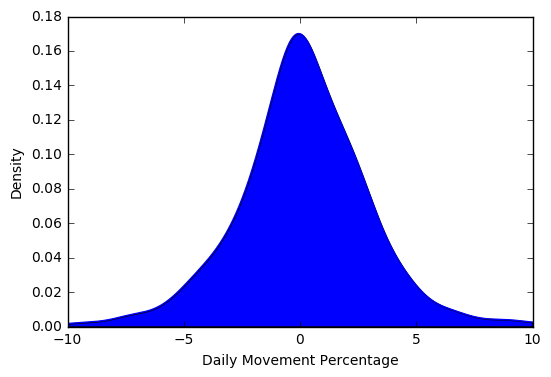

In [6]:
## Show a regular plot for comparison
plot_gaussian(x, fill=True)
plt.show()

In [7]:
def plot_gaussian_categorical(x, x_min=-10, x_max=10, n=10000, title=''):
    ''' 
    Expects an np array of movement percentages, 
    plots the gaussian kernel density estimate
    '''
    ## Learn the kernel-density estimate from the data
    density = stats.gaussian_kde(x)
    
    ## Evaluate the output on some data points
    xs = np.linspace(x_min, x_max, n)
    y = density.evaluate(xs)
    
    ## Create the plot
    plt.plot(xs, y)
    plt.xlabel('Daily Movement Percentage')
    plt.ylabel('Density')
    
    ## Get stats
    mu, sigma = np.mean(x), np.std(x)
 
    ## Plot with conditionals
    plt.fill_between(xs, 0, y, where= xs < mu, facecolor='#eeeedd', interpolate=True) ## Modest Drop
    plt.fill_between(xs, 0, y, where= xs < (mu - sigma / 2), facecolor='yellow', interpolate=True) ## Drop
    plt.fill_between(xs, 0, y, where= xs < (mu - sigma), facecolor='orange', interpolate=True) ## Big Drop
    plt.fill_between(xs, 0, y, where= xs < (mu - 2*sigma), facecolor='red', interpolate=True) ## Very big drop
    
    plt.fill_between(xs, 0, y, where= xs > mu, facecolor='#ebfaeb', interpolate=True) ## Modest Gain
    plt.fill_between(xs, 0, y, where= xs > (mu + sigma/2), facecolor='#b5fbb6', interpolate=True) ## Gain
    plt.fill_between(xs, 0, y, where= xs > (mu + sigma), facecolor='#6efa70', interpolate=True) ## Big Gain
    plt.fill_between(xs, 0, y, where= xs > (mu + 2*sigma), facecolor='green', interpolate=True) ## Very Big Gain
    
    ## Label mu and sigma
    plt.text(x_min + 1, max(y) * 0.8, r'$\mu$ = ' + '{0:.2f}'.format(mu))
    plt.text(x_min + 1, max(y) * 0.9, r'$\sigma$ = ' + '{0:.2f}'.format(sigma))
    ## Set title if given
    if (len(title) != 0):
        plt.title(title)

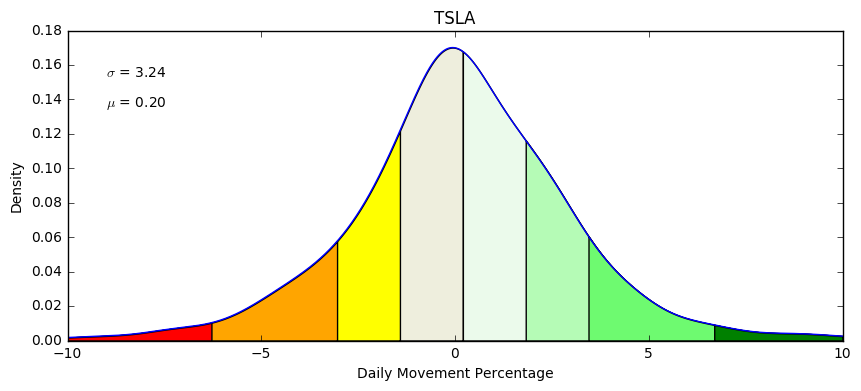

In [8]:
plt.figure(figsize=(10,4))
plot_gaussian_categorical(x, title='TSLA')
plt.show()

## Now lets try it with the rest of our stocks

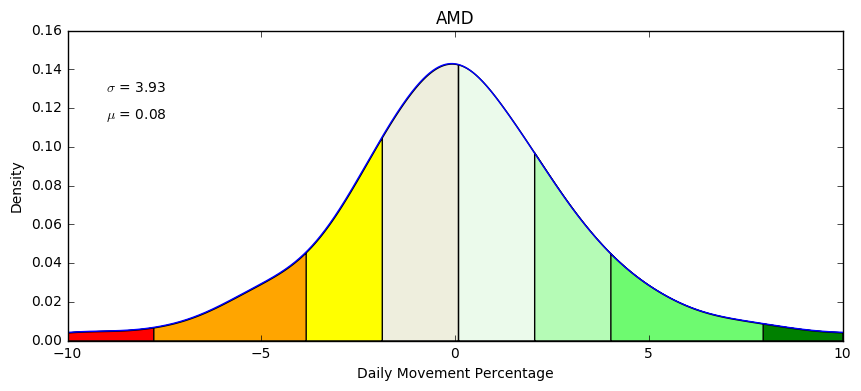

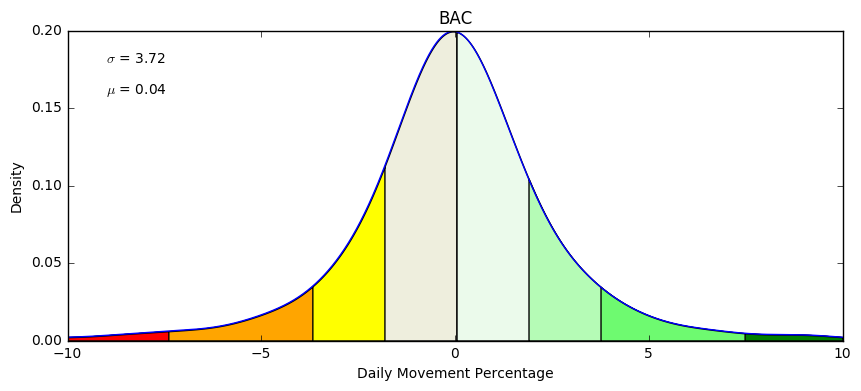

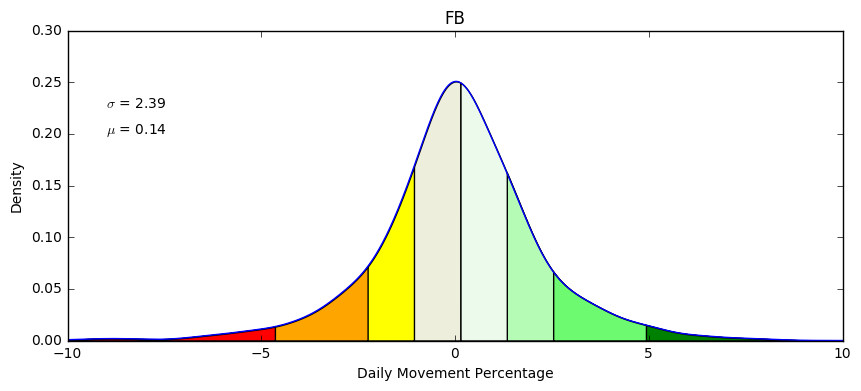

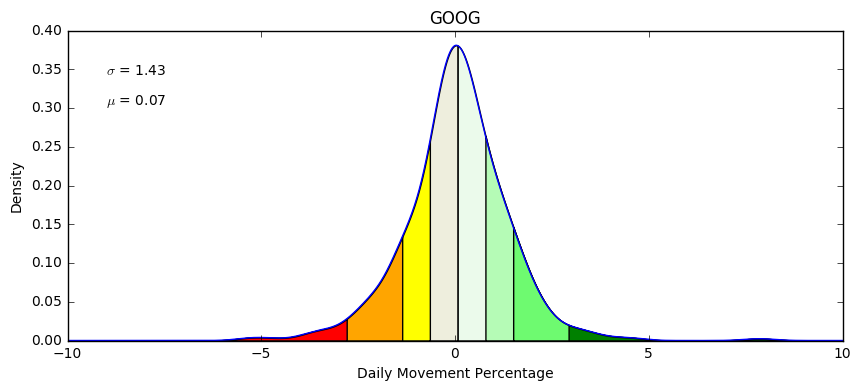

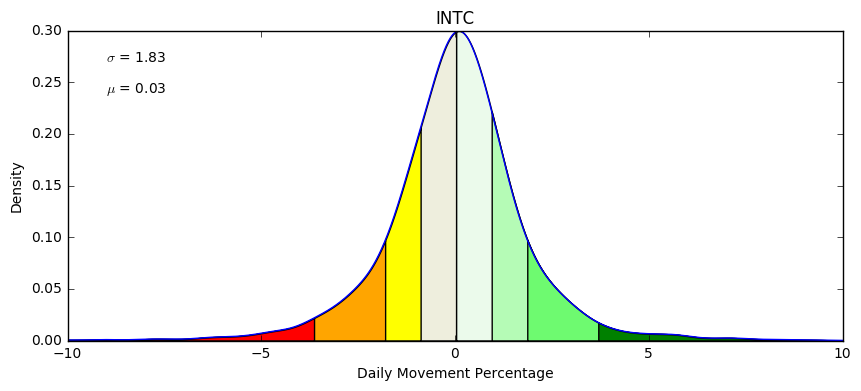

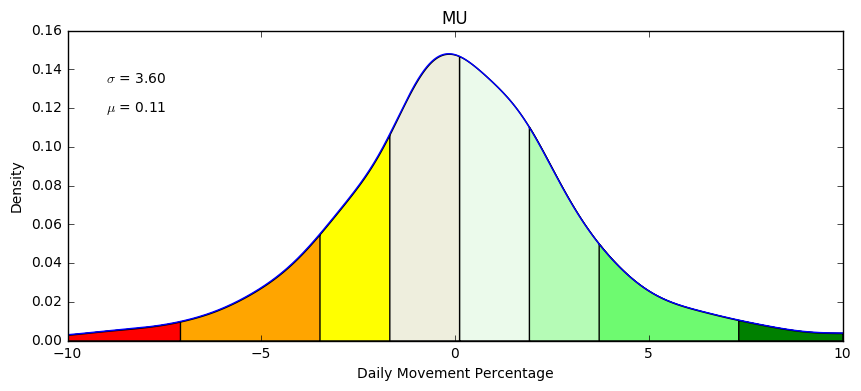

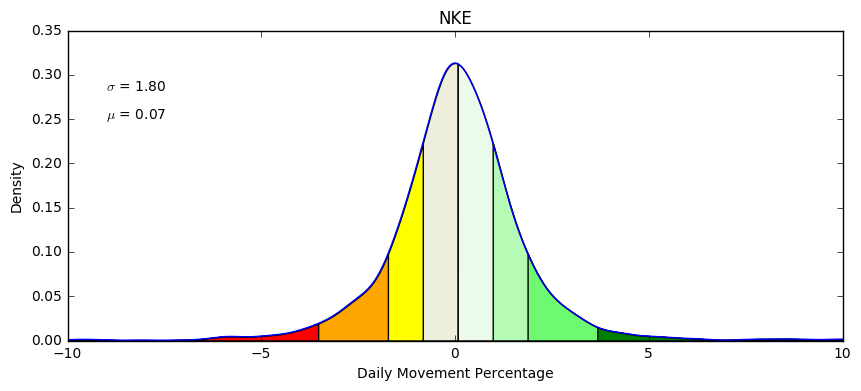

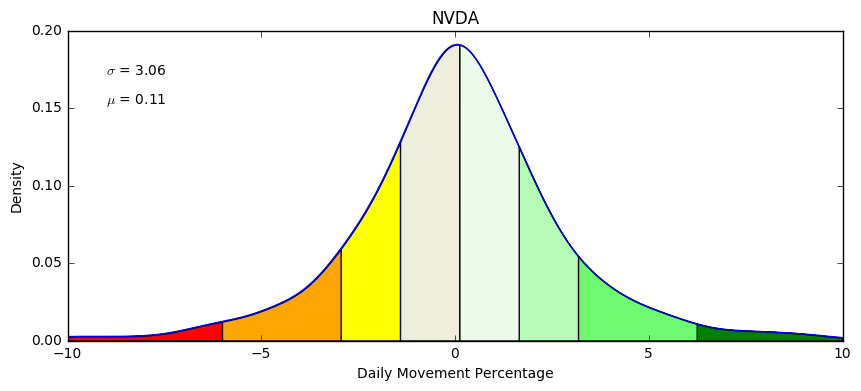

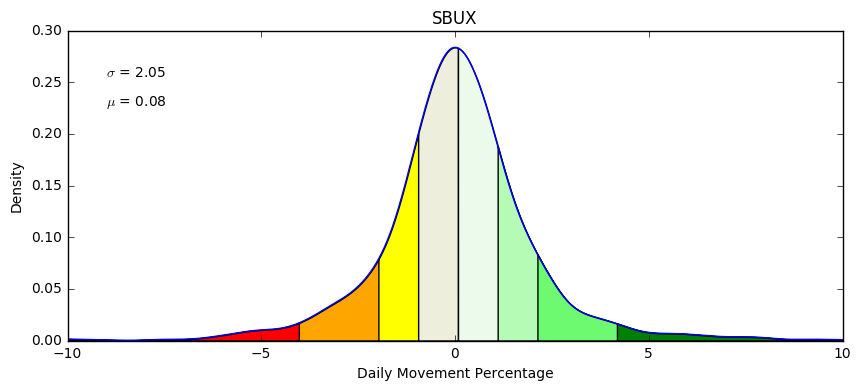

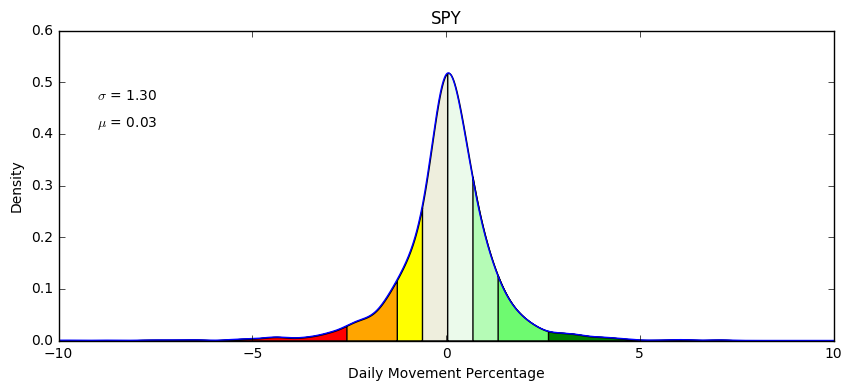

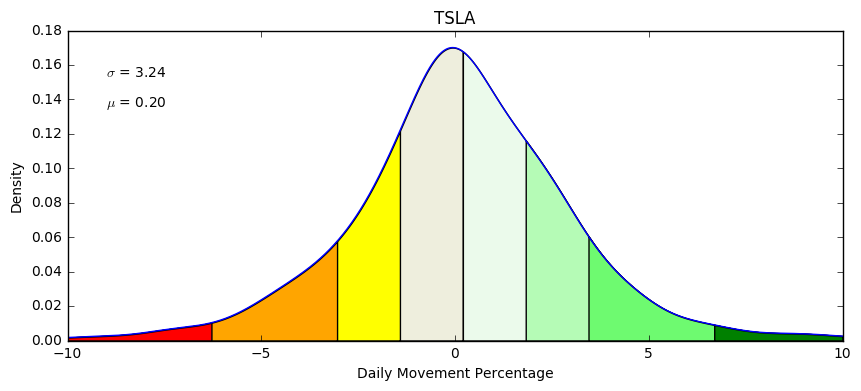

In [9]:
g = glob.glob('*.csv')

for i in range(len(g)):
    plt.figure(figsize=(10,4))
    df = pd.DataFrame()
    df = df.from_csv(g[i])
    x = get_price_movements(df)
    plot_gaussian_categorical(x, title=ticker_from_csv(g[i]))

plt.show()